In [1]:
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


In [2]:
import Python
import TensorFlow

In [3]:
let plt = Python.import("matplotlib.pyplot")

In [4]:
let SAMPLE_SIZE = 100

let a: Float = 2.0
let b: Float = 1.5
let x = Tensor<Float>(rangeFrom: 0, to: 1, stride: 1.0 / Float(SAMPLE_SIZE))
let noise = (Tensor<Float>(randomNormal: [SAMPLE_SIZE]) - 0.5) * 0.1
let y = (a * x + b) + noise

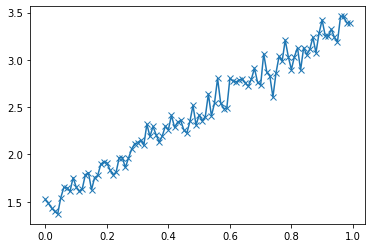

None


In [5]:
plt.clf()
plt.plot(x.makeNumpyArray(), y.makeNumpyArray(), marker: "x")
plt.show()

In [6]:
print(x.shape)
print(y.shape)

[100]
[100]


In [7]:
let X = x.reshaped(toShape: [100, 1]) //SAMPLE_SIZE
let Y = y.reshaped(toShape: [100, 1]) //SAMPLE_SIZE
print(X.shape)
print(Y.shape)

[100, 1]
[100, 1]


In [8]:
struct LinearRegression: Layer {
    var layer1 = Dense<Float>(inputSize: 1, outputSize: 1, activation: identity)
    
    @differentiable
    func callAsFunction(_ input: Tensor<Float>) -> Tensor<Float> {
        return layer1(input)
    }
}


In [9]:
var regression = LinearRegression()
let optimizer = SGD(for: regression, learningRate: 0.03)
Context.local.learningPhase = .training

In [10]:
for _ in 0..<1000 {
    let 𝛁model = regression.gradient { r -> Tensor<Float> in
        let ŷ = r(X)
        let loss = meanSquaredError(predicted: ŷ, expected: Y)
        print("Loss: \(loss)")
        return loss
    }
    optimizer.update(&regression, along: 𝛁model)
}

Loss: 10.860552
Loss: 9.327721
Loss: 8.017907
Loss: 6.898608
Loss: 5.942063
Loss: 5.1245537
Loss: 4.425819
Loss: 3.8285515
Loss: 3.3179655
Loss: 2.8814306
Loss: 2.508157
Loss: 2.1889281
Loss: 1.9158697
Loss: 1.6822555
Loss: 1.48234
Loss: 1.3112137
Loss: 1.1646844
Loss: 1.0391694
Loss: 0.93160856
Loss: 0.8393882
Loss: 0.7602751
Loss: 0.6923615
Loss: 0.6340179
Loss: 0.58385175
Loss: 0.54067415
Loss: 0.503469
Loss: 0.47136843
Loss: 0.44363108
Loss: 0.41962335
Loss: 0.39880416
Loss: 0.38071144
Loss: 0.36495003
Loss: 0.35118264
Loss: 0.3391211
Loss: 0.32851917
Loss: 0.31916642
Loss: 0.31088316
Loss: 0.30351585
Loss: 0.2969333
Loss: 0.29102334
Loss: 0.28569034
Loss: 0.28085235
Loss: 0.2764395
Loss: 0.27239203
Loss: 0.2686589
Loss: 0.26519647
Loss: 0.26196748
Loss: 0.25893998
Loss: 0.25608677
Loss: 0.25338456
Loss: 0.25081345
Loss: 0.2483564
Loss: 0.24599884
Loss: 0.24372828
Loss: 0.24153414
Loss: 0.23940727
Loss: 0.2373398
Loss: 0.23532516
Loss: 0.23335752
Loss: 0.23143202
Loss: 0.22954449
L

Loss: 0.013325312
Loss: 0.01329505
Loss: 0.013265028
Loss: 0.013235244
Loss: 0.01320569
Loss: 0.013176377
Loss: 0.013147294
Loss: 0.013118438
Loss: 0.01308981
Loss: 0.013061414
Loss: 0.013033238
Loss: 0.013005284
Loss: 0.012977553
Loss: 0.012950041
Loss: 0.012922746
Loss: 0.012895665
Loss: 0.012868797
Loss: 0.012842148
Loss: 0.012815706
Loss: 0.012789471
Loss: 0.012763443
Loss: 0.012737623
Loss: 0.012712009
Loss: 0.012686597
Loss: 0.012661381
Loss: 0.012636368
Loss: 0.012611551
Loss: 0.012586933
Loss: 0.012562509
Loss: 0.012538272
Loss: 0.012514231
Loss: 0.012490384
Loss: 0.0124667175
Loss: 0.012443249
Loss: 0.012419956
Loss: 0.012396848
Loss: 0.012373927
Loss: 0.012351188
Loss: 0.012328625
Loss: 0.012306239
Loss: 0.012284036
Loss: 0.012262001
Loss: 0.012240147
Loss: 0.012218463
Loss: 0.012196951
Loss: 0.0121756075
Loss: 0.012154438
Loss: 0.012133427
Loss: 0.012112593
Loss: 0.012091918
Loss: 0.012071404
Loss: 0.012051055
Loss: 0.012030866
Loss: 0.012010834
Loss: 0.011990969
Loss: 0.011

In [13]:
Context.local.learningPhase = .inference
let score = regression(X)
let y2 = score.reshaped(toShape: [100])

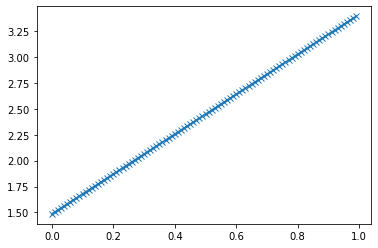

None


In [14]:
plt.clf()
plt.plot(x.makeNumpyArray(), y2.makeNumpyArray(), marker: "x")
plt.show()